In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置图片清晰度
plt.rcParams['figure.dpi'] =300
plt.rcParams['font.family'] = "Arial"
# 保证能在Ai内编辑
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

D:\Soft\code_soft\anaconda\envs\rgis9\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# 读取excel数据
df = pd.read_excel(r'D:\PhD\UCAS\Undergraduate\Projects\Python\datas\9123Mean.xlsx')
years = df.iloc[:, 0]
data_columns = df.columns[1:]
linestyles = ["-", "-", "-", "-", "-", "-"]
markers = [".", ".", ".", ".", "x", "."]
colors = ["#a2d99d", "#cf77b1", "#a1c5e6", "#efb282", "#fab0af", "#ec7f80"]

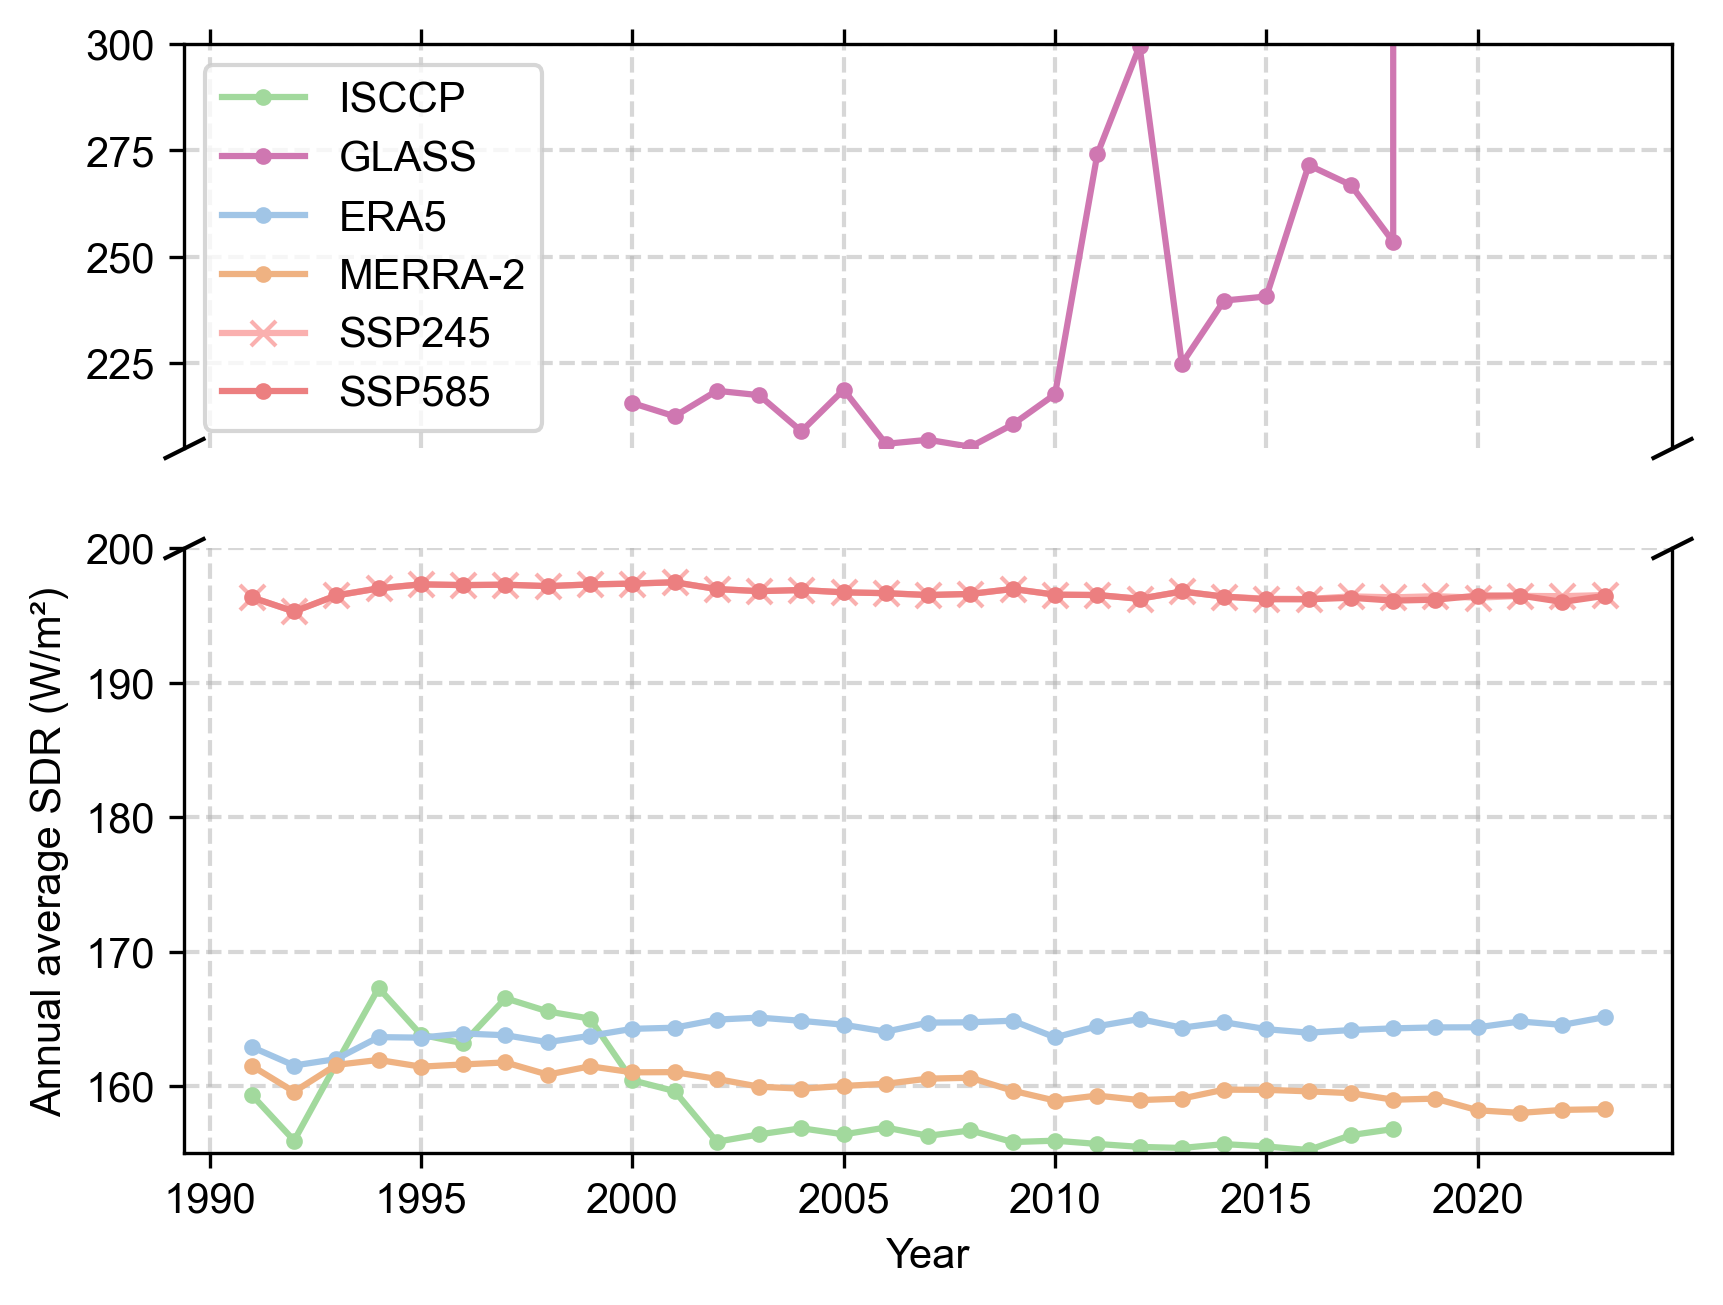

In [7]:
# 创建一个包含两个子图的绘图区域
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 3]})
# 绘制每列数据的折线图
for column, linestyle, maker, color in zip(data_columns, linestyles, markers, colors):
    ax1.plot(years, df[column], label=column, linestyle=linestyle, marker=maker, color=color)
    ax2.plot(years, df[column], label=column, linestyle=linestyle, marker=maker, color=color)
    ax1.grid(ls='--',alpha=0.5,linewidth=1)
    ax2.grid(ls='--',alpha=0.5,linewidth=1)

# 设置子图的 Y 轴范围
ax1.set_ylim(205, 300)  # 截断的上半部分
ax1.legend(loc='upper left')
ax2.set_ylim(155, 200)  # 截断的下半部分


# 隐藏两个子图之间的边框
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # 不显示上子图的 X 轴标签
ax2.xaxis.tick_bottom()

# 添加截断标记
d = .5  # 截断标记的大小
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# 设置 X 轴和 Y 轴标签
ax2.set_xlabel('Year')
ax2.set_ylabel('Annual average SDR (W/m²)')



# 显示图形
plt.show()
# 保存为矢量
fig.savefig('figs/03折线图9123.pdf', format='pdf', dpi=1000, bbox_inches='tight')